In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [77]:
df = pd.read_csv('result.csv')

In [89]:
df.columns

Index(['TARGET', 'AGE', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'CHILD_TOTAL',
       'DEPENDANTS', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL',
       'FL_PRESENCE_FL', 'OWN_AUTO', 'FAMILY_INCOME', 'PERSONAL_INCOME',
       'NUM_LOANS', 'NUM_CLOSED_LOANS'],
      dtype='object')

In [92]:
dic = {"B": 2, 'A': 1}

pd.DataFrame(data=dic, index=[0])

,B,A
0,2,1


In [78]:
def education_transform(val):
    mapping ={
        'Среднее специальное': 0, 'Среднее':1, 'Высшее':2, 'Неоконченное высшее':3,
       'Неполное среднее':4, 'Два и более высших образования':5, 'Ученая степень':6
    }
    return mapping[val]
def marital_transform(val):
    mapping = {
        'Состою в браке': 0, 'Не состоял в браке': 1, 'Разведен(а)': 2, 'Вдовец/Вдова': 3,
       'Гражданский брак': 4
    }
    return mapping[val]

def income_transform(val):
    mapping = {
        'от 10000 до 20000 руб.': 0, 'от 20000 до 50000 руб.': 1,
       'от 5000 до 10000 руб.': 2, 'свыше 50000 руб.': 3, 'до 5000 руб.': 4
    }
    return mapping[val]

df['EDUCATION'] = df['EDUCATION'].apply(education_transform)
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].apply(marital_transform)
df['FAMILY_INCOME'] = df['FAMILY_INCOME'].apply(income_transform)

dropping = ['AGREEMENT_RK', 'ID', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE']
df = df.drop(columns=dropping)
df_encoded = pd.get_dummies(df, columns=['EDUCATION', 'MARITAL_STATUS', 'FAMILY_INCOME'])

In [ ]:

# df['Loyalty'] = df['Customer Type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)
# df['Business_travel'] = df['Type of Travel'].apply(lambda x: 1 if x == 'Business travel' else 0)
# df['Satisfied'] = df['satisfaction'].apply(lambda x: 0 if x == 'neutral or dissatisfied' else 1)

# one-hot для признака с 3 значениями
enc_class = pd.get_dummies(df['Class'], drop_first=True)
df = pd.concat([df, enc_class], axis=1)


# Assuming 'df' is your DataFrame

# Function to encode string columns using LabelEncoder
def encode_string_columns(df):
    label_encoder = LabelEncoder()
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df

# Function to apply one-hot encoding to columns with multiple categorical values
def one_hot_encode_top_n(df, columns, n=5):
    for column in columns:
        if column in df.columns and len(df[column].unique()) > n:
            top_n_values = df[column].value_counts().nlargest(n).index
            df[column] = df[column].where(df[column].isin(top_n_values), 'Other')
        df = pd.get_dummies(df, columns=[column], prefix=column, drop_first=True)
    return df

# List of string columns for LabelEncoding
string_columns = ['EDUCATION', 'MARITAL_STATUS', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
             , 'POSTAL_ADDRESS_PROVINCE', 'FAMILY_INCOME']

# Apply LabelEncoder to string columns
df_encoded = encode_string_columns(df[string_columns])

# List of columns for one-hot encoding
columns_for_one_hot = ['EDUCATION', 'MARITAL_STATUS', 'REG_ADDRESS_PROVINCE', 'FAMILY_INCOME']

# Apply one-hot encoding
df_encoded = one_hot_encode_top_n(df_encoded, columns_for_one_hot)

In [72]:
df_encoded

,FACT_ADDRESS_PROVINCE,FL_PRESENCE_FL,POSTAL_ADDRESS_PROVINCE,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_Other,MARITAL_STATUS_1,MARITAL_STATUS_2,...,MARITAL_STATUS_4,REG_ADDRESS_PROVINCE_26,REG_ADDRESS_PROVINCE_30,REG_ADDRESS_PROVINCE_50,REG_ADDRESS_PROVINCE_75,REG_ADDRESS_PROVINCE_Other,FAMILY_INCOME_1,FAMILY_INCOME_2,FAMILY_INCOME_3,FAMILY_INCOME_4
0,46,0,45,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,19,0,18,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
2,18,0,17,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
3,52,1,51,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4,19,0,18,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15218,13,0,13,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
15219,6,0,6,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
15220,8,0,8,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
15221,50,1,49,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


Text(0.5, 1.0, 'Distribution of Age')

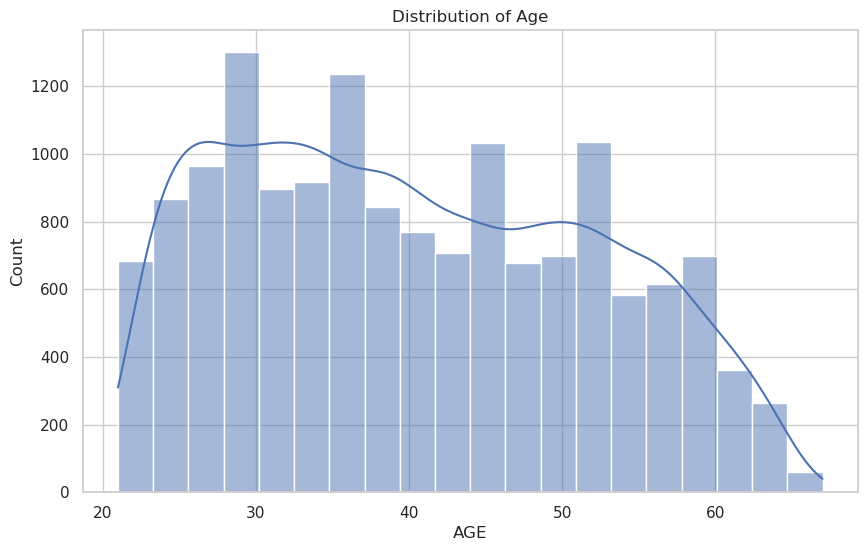

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True, ax=ax)
plt.title('Distribution of Age')

In [22]:
df['NUM_LOANS'].value_counts()

1     11288
2      2633
3       871
4       275
5       102
6        36
7        14
8         3
11        1
Name: NUM_LOANS, dtype: int64

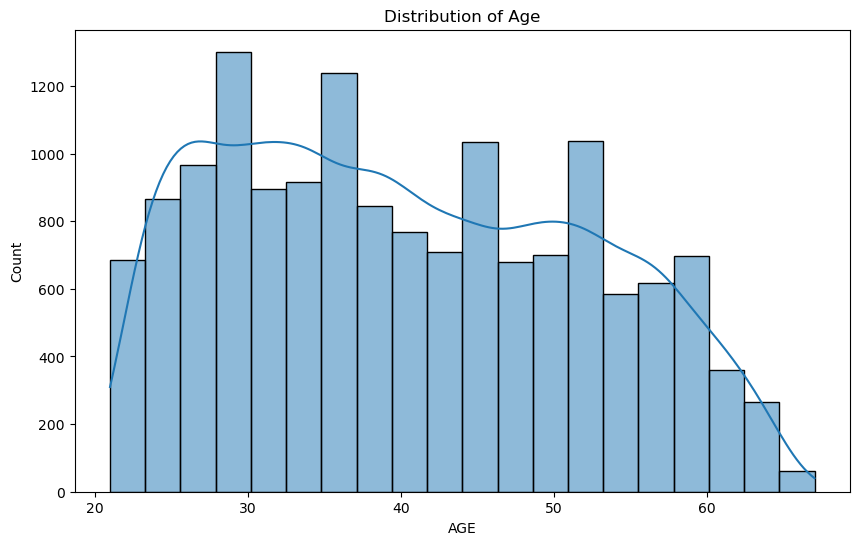

In [28]:
# Plot a histogram of the AGE column
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()


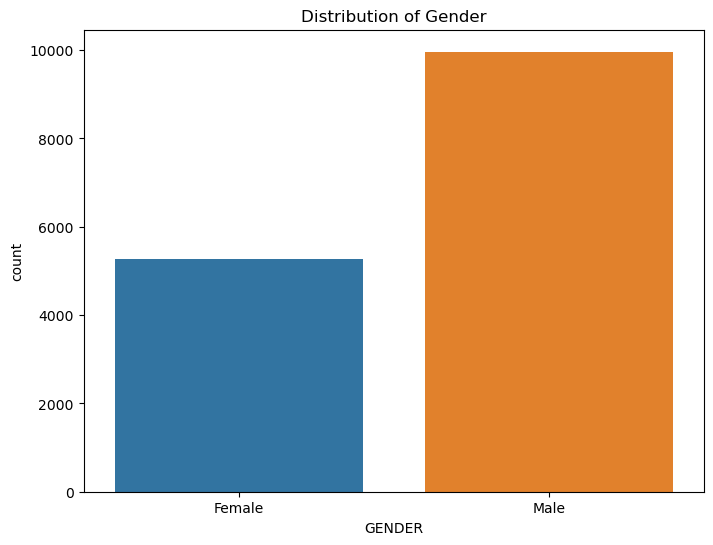

In [29]:

# Plot a count plot for GENDER
plt.figure(figsize=(8, 6))
sns.countplot(x='GENDER', data=df)
plt.title('Distribution of Gender')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])  # Customize x-axis ticks
plt.show()


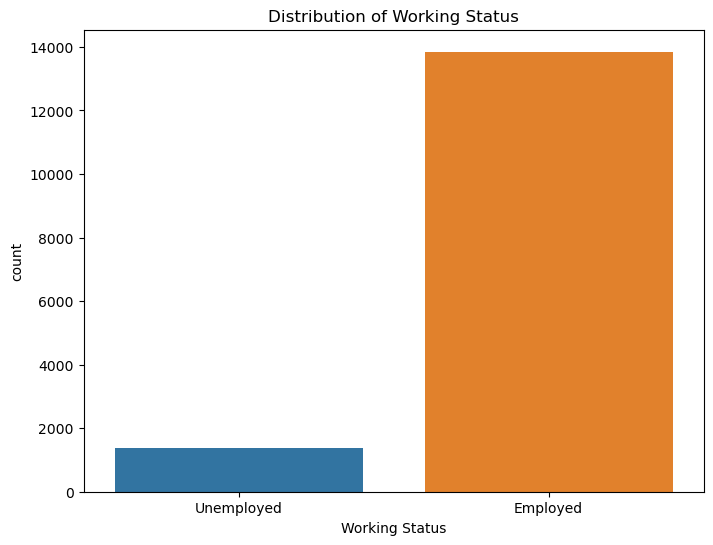

In [44]:
# Plot a count plot for SOCSTATUS_WORK_FL
plt.figure(figsize=(8, 6))
sns.countplot(x='SOCSTATUS_WORK_FL', data=df)
plt.title('Distribution of Working Status')
plt.xticks(ticks=[0, 1], labels=['Unemployed', 'Employed'])  # Customize x-axis ticks
plt.xlabel('Working Status')
plt.show()

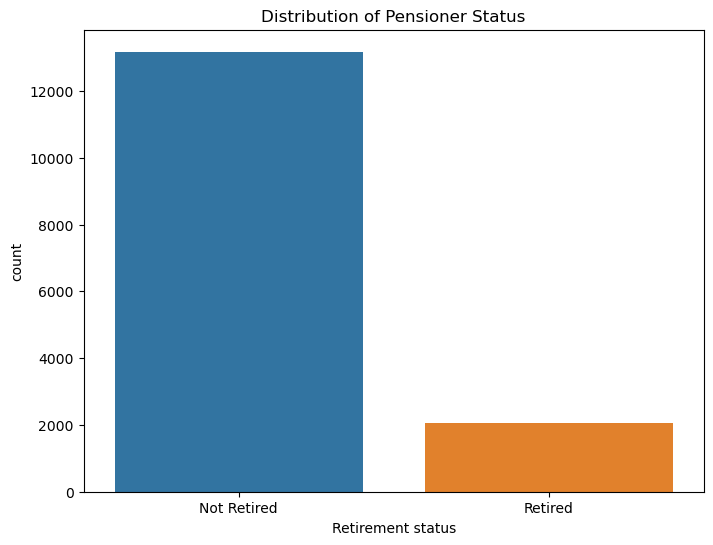

In [43]:
# Plot a count plot for SOCSTATUS_PENS_FL
plt.figure(figsize=(8, 6))
sns.countplot(x='SOCSTATUS_PENS_FL', data=df)
plt.title('Distribution of Pensioner Status')
plt.xticks(ticks=[0, 1], labels=['Not Retired', 'Retired'])  # Customize x-axis ticks
plt.xlabel('Retirement status')
plt.show()

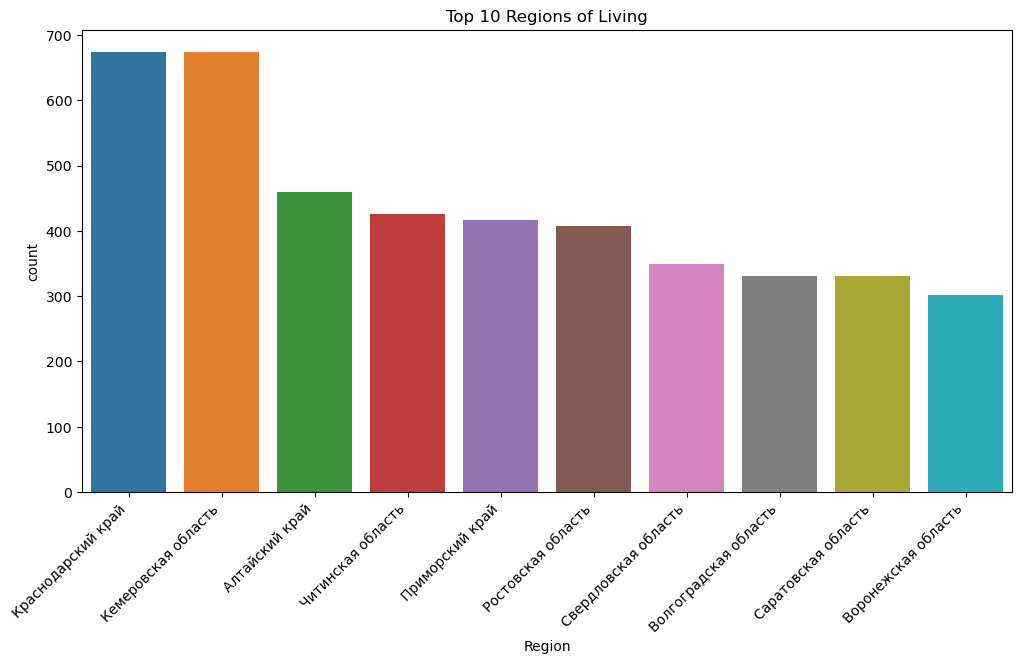

In [42]:
# Plot a count plot for REG_ADDRESS_PROVINCE (top 10 regions)
top_regions = df['REG_ADDRESS_PROVINCE'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_regions.index, y=top_regions.values)
plt.title('Top 10 Regions of Living')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Region')
plt.ylabel('count')
plt.show()

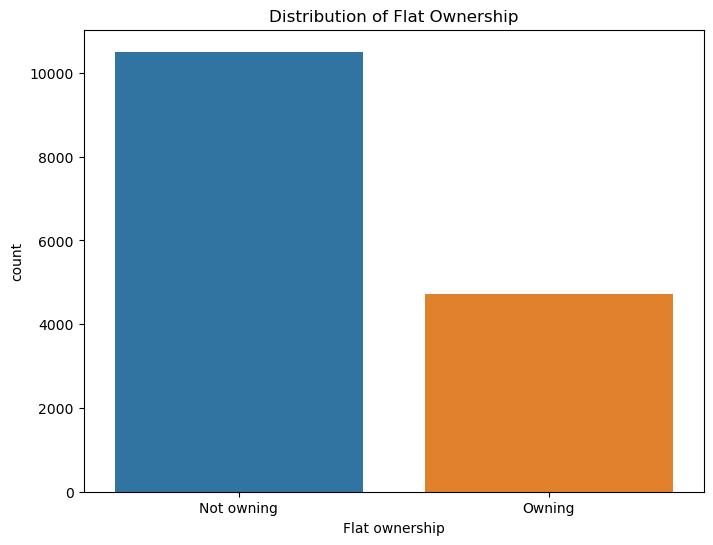

In [41]:

# Plot a count plot for FL_PRESENCE_FL
plt.figure(figsize=(8, 6))
sns.countplot(x='FL_PRESENCE_FL', data=df)
plt.title('Distribution of Flat Ownership')
plt.xticks(ticks=[0, 1], labels=['Not owning', 'Owning'])  # Customize x-axis ticks
plt.xlabel('Flat ownership')
plt.show()

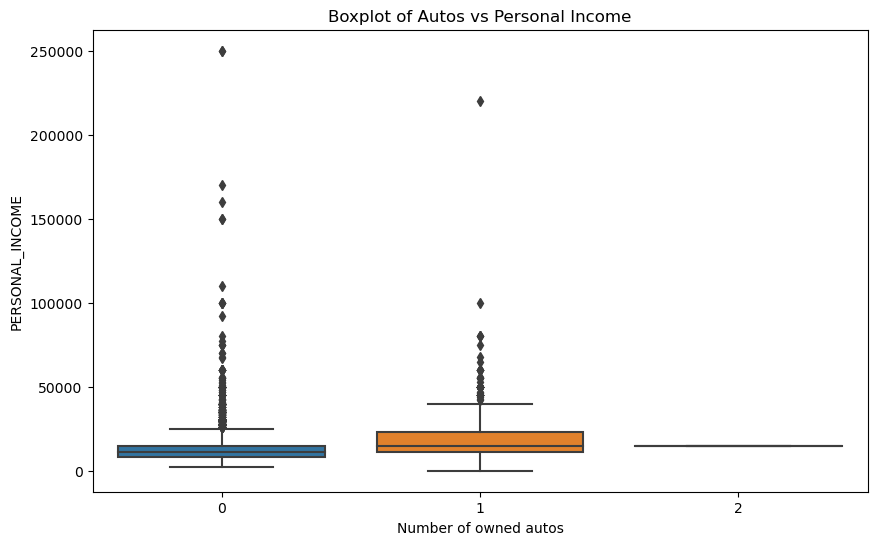

In [40]:
# Plot a boxplot for OWN_AUTO
plt.figure(figsize=(10, 6))
sns.boxplot(x='OWN_AUTO', y='PERSONAL_INCOME', data=df)
plt.title('Boxplot of Autos vs Personal Income')
plt.xlabel('Number of owned autos')
plt.show()


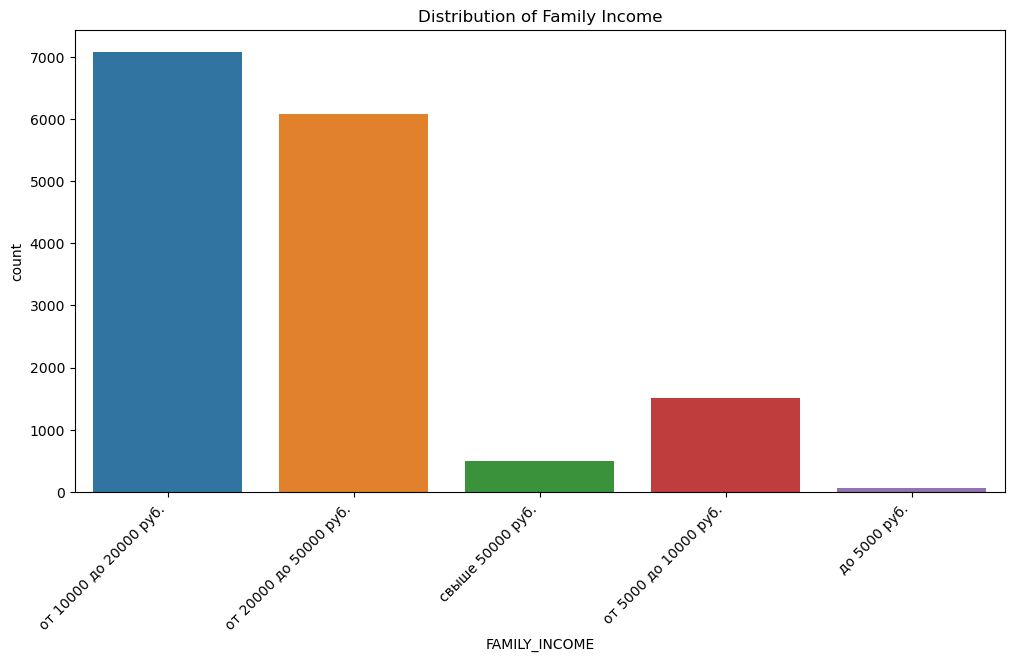

In [45]:
# Plot a count plot for FAMILY_INCOME
plt.figure(figsize=(12, 6))
sns.countplot(x='FAMILY_INCOME', data=df)
plt.title('Distribution of Family Income')
plt.xticks(rotation=45, ha='right')
plt.show()

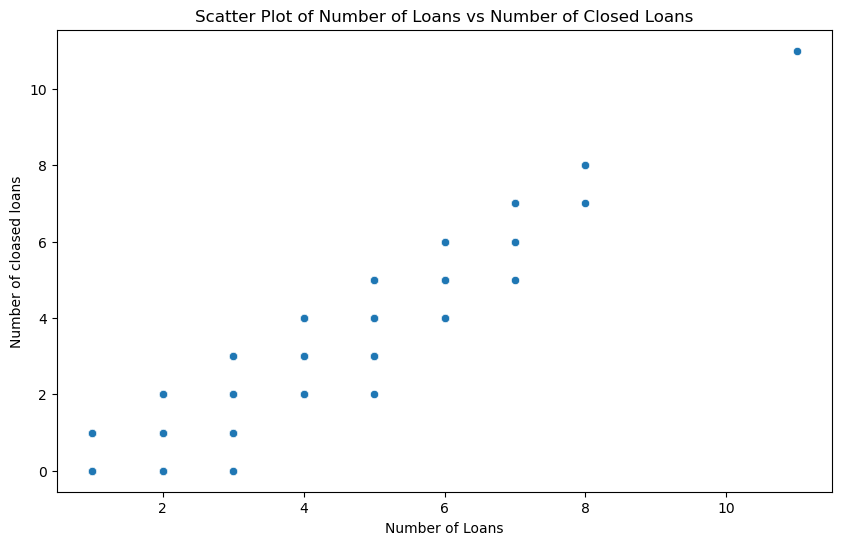

In [47]:
# Plot a scatter plot for NUM_LOANS vs NUM_CLOSED_LOANS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NUM_LOANS', y='NUM_CLOSED_LOANS', data=df)
plt.title('Scatter Plot of Number of Loans vs Number of Closed Loans')
plt.xlabel('Number of Loans')
plt.ylabel('Number of cloased loans')
plt.show()

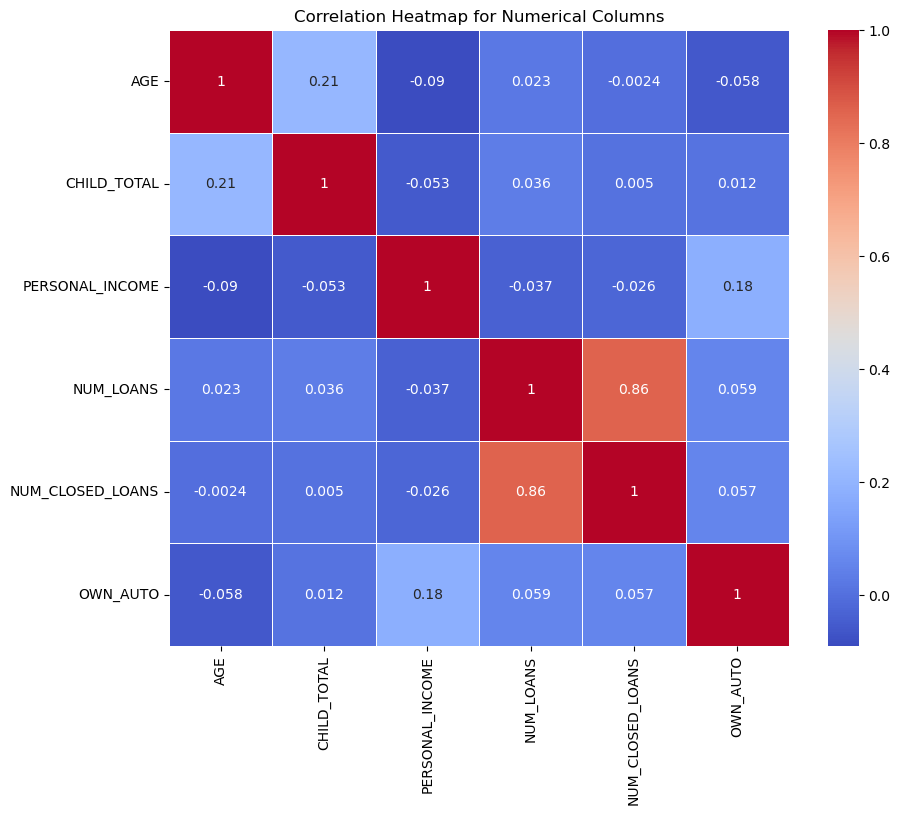

In [54]:
# Create a correlation heatmap for all numerical columns
numerical_columns = ['AGE', 'CHILD_TOTAL', 'PERSONAL_INCOME', 'NUM_LOANS', 'NUM_CLOSED_LOANS', 'OWN_AUTO']
correlation_matrix_all = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Correlation Heatmap for Numerical Columns')
plt.show()


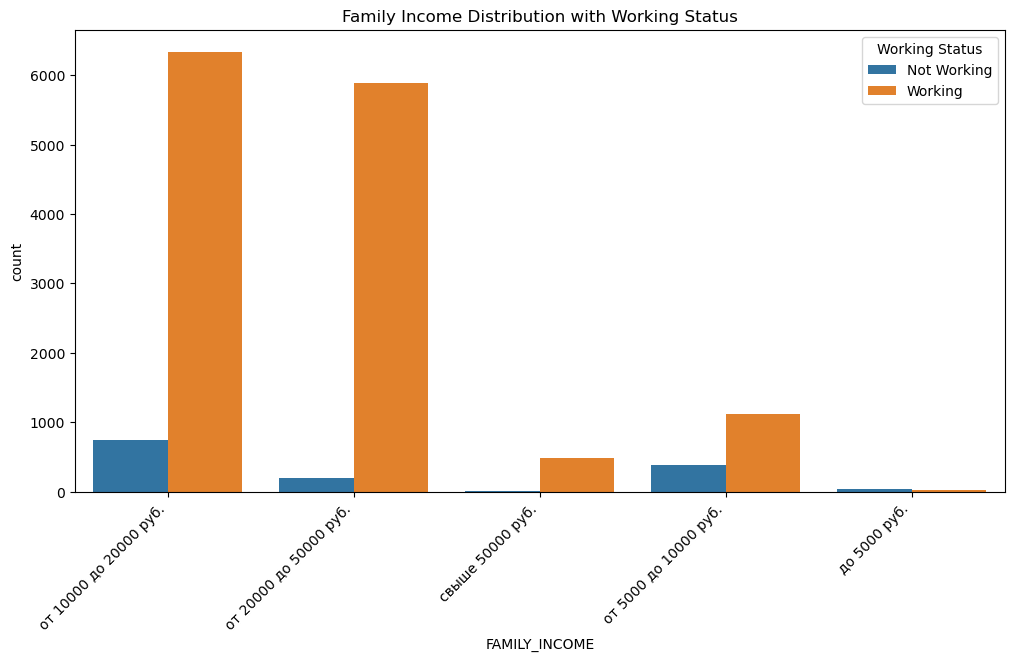

In [57]:
# Plot a count plot for FAMILY_INCOME with hue of SOCSTATUS_WORK_FL
plt.figure(figsize=(12, 6))
sns.countplot(x='FAMILY_INCOME', hue='SOCSTATUS_WORK_FL', data=df)
plt.title('Family Income Distribution with Working Status')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Working Status', labels=['Not Working', 'Working'])
plt.show()

In [59]:
df.describe()

,AGREEMENT_RK,ID,TARGET,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,PERSONAL_INCOME,NUM_LOANS,NUM_CLOSED_LOANS
count,1.522300e+04,1.522300e+04,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000
mean,6.540183e+07,1.068120e+08,0.119030,40.406096,0.654536,1.099389,0.645208,0.909610,0.134468,0.309794,0.116337,13853.836323,1.387769,0.751889
std,4.568181e+06,4.394646e+03,0.323835,11.601068,0.475535,0.995411,0.812252,0.286748,0.341165,0.462424,0.320844,9015.467617,0.793566,0.988499
min,5.991015e+07,1.068044e+08,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000,0.000000
25%,6.192092e+07,1.068082e+08,0.000000,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,8000.000000,1.000000,0.000000
50%,6.437100e+07,1.068120e+08,0.000000,39.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12000.000000,1.000000,0.000000
75%,6.708802e+07,1.068158e+08,0.000000,50.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,17000.000000,2.000000,1.000000
max,7.529224e+07,1.068196e+08,1.000000,67.000000,1.000000,10.000000,7.000000,1.000000,1.000000,1.000000,2.000000,250000.000000,11.000000,11.000000


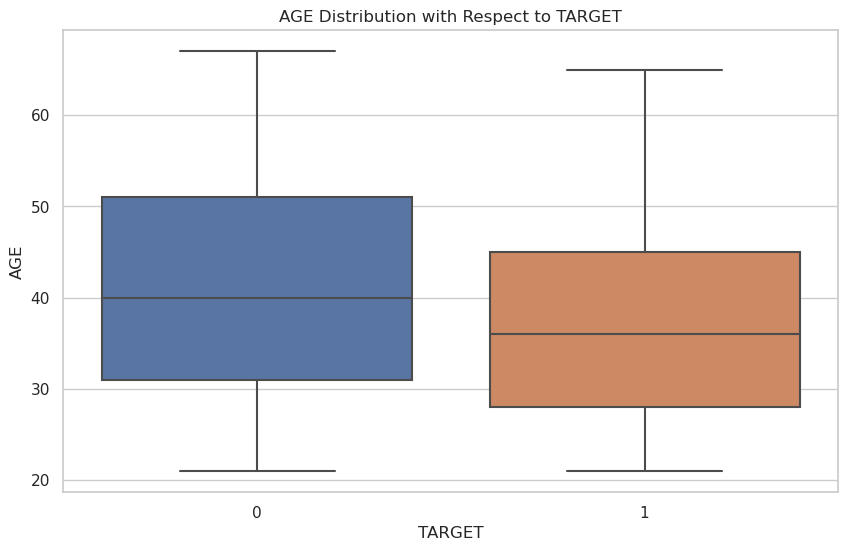

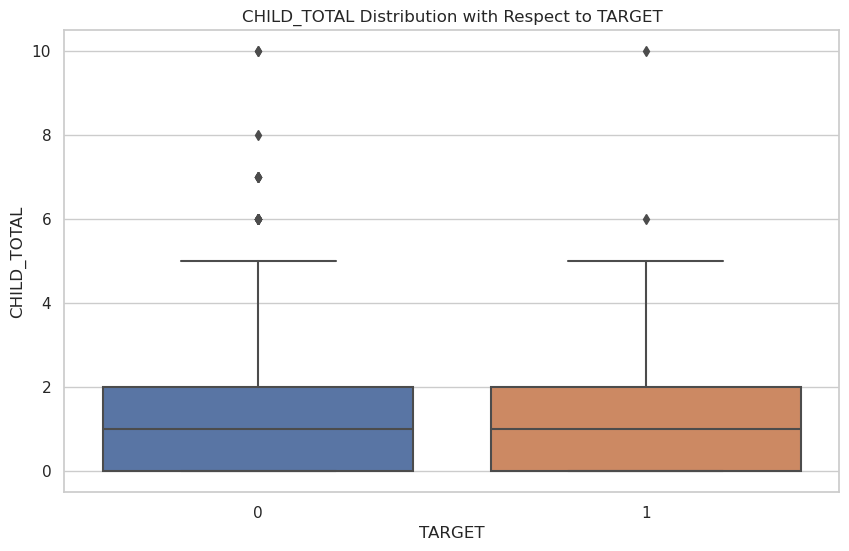

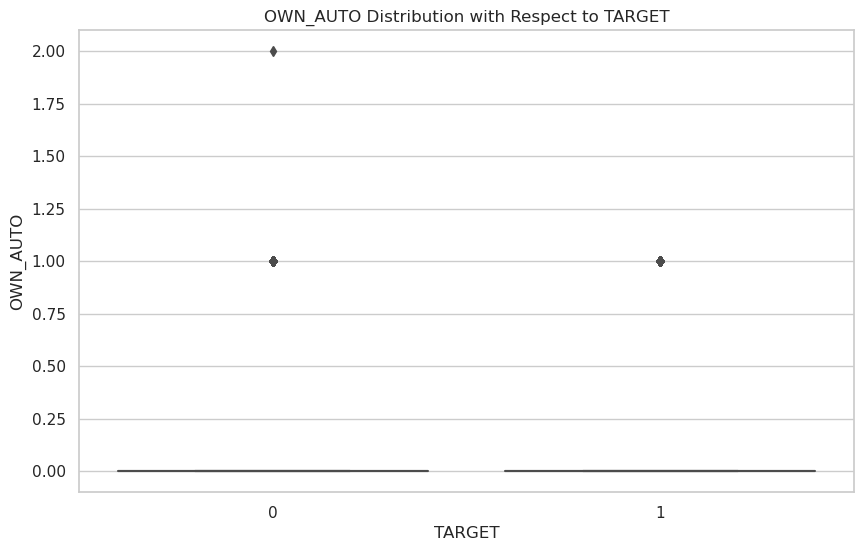

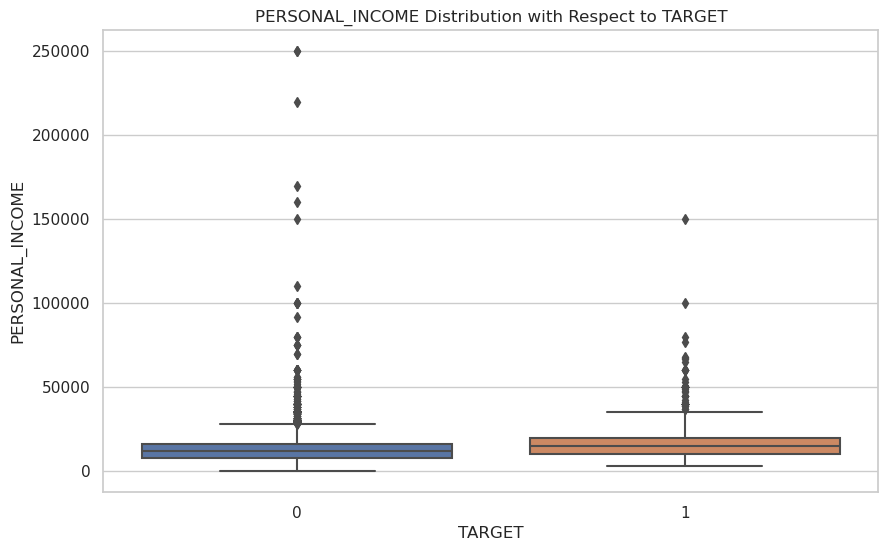

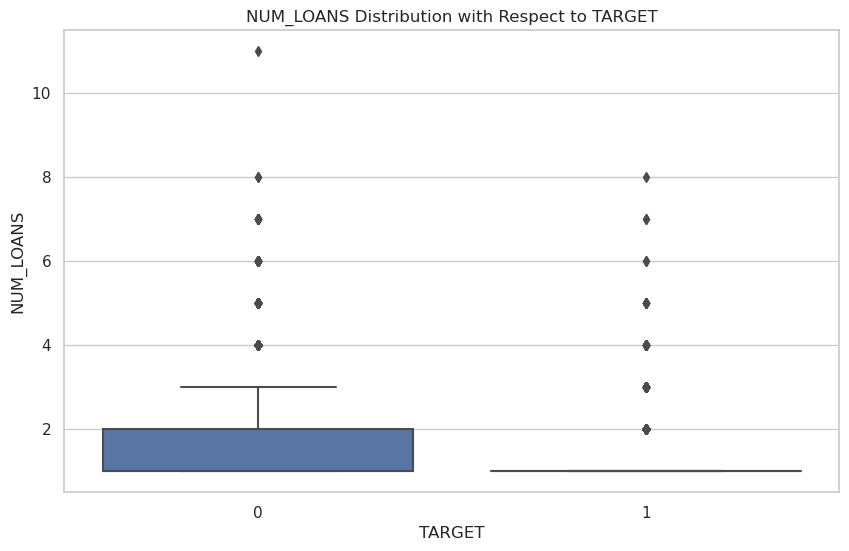

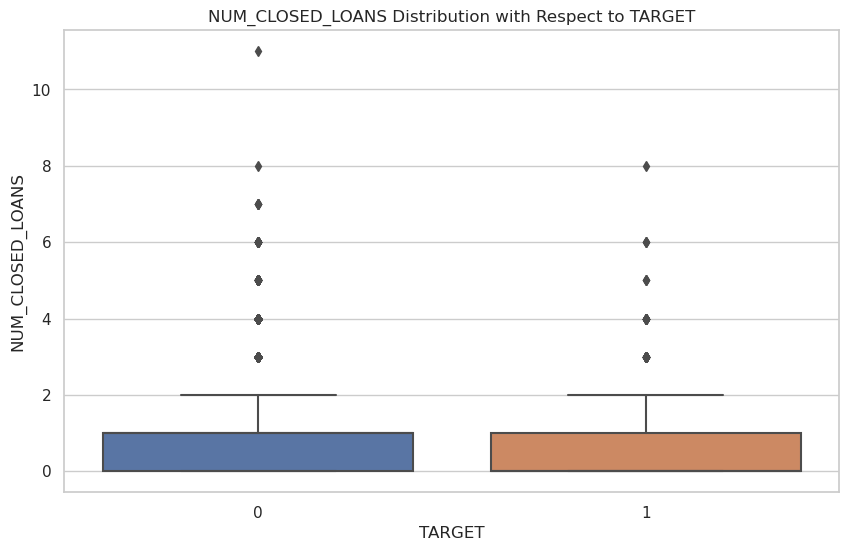

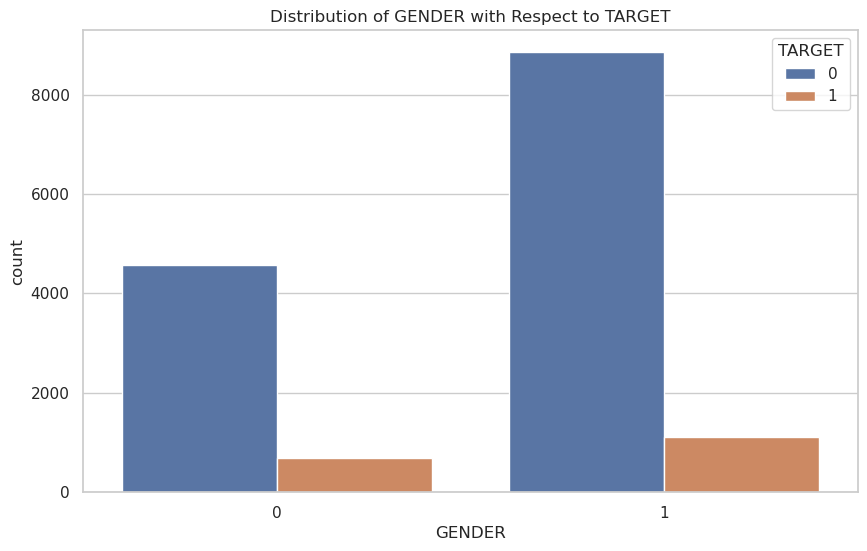

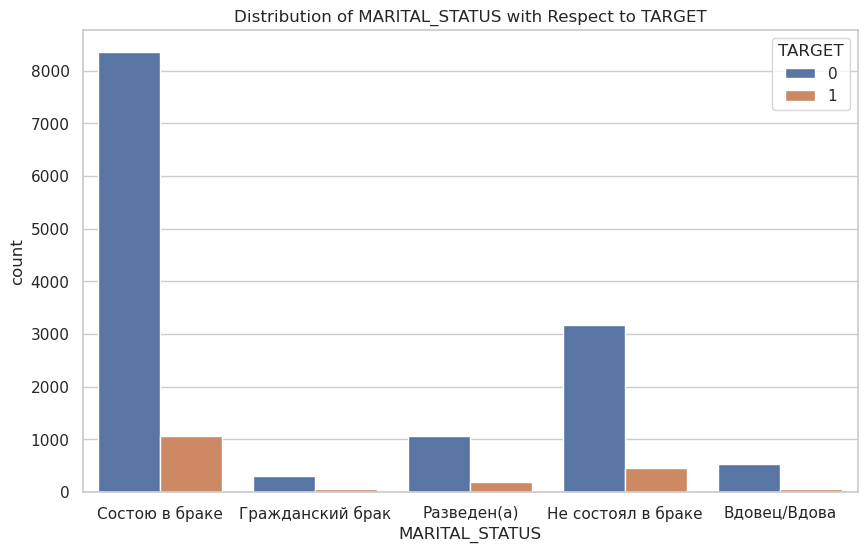

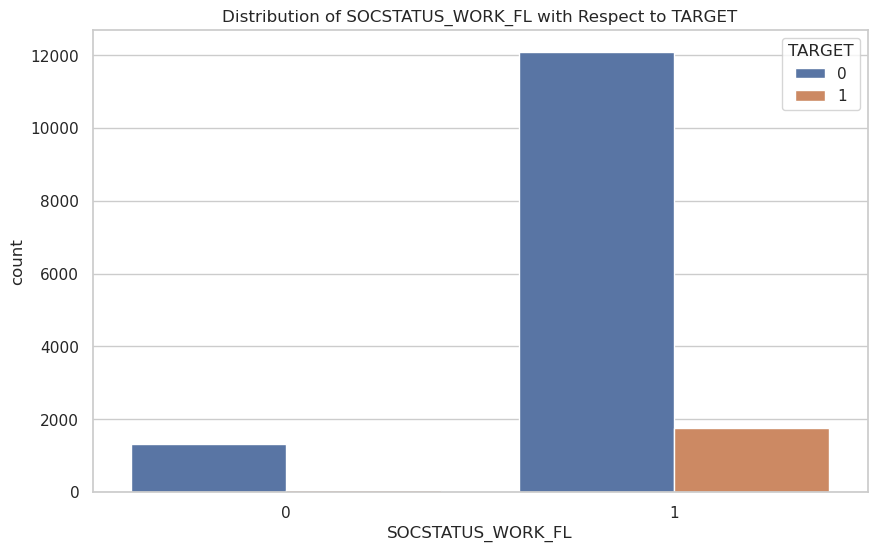

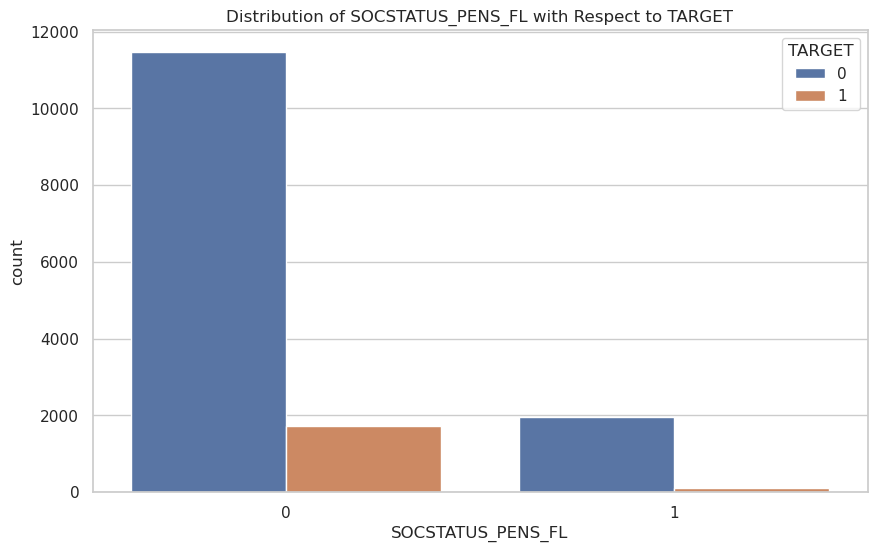

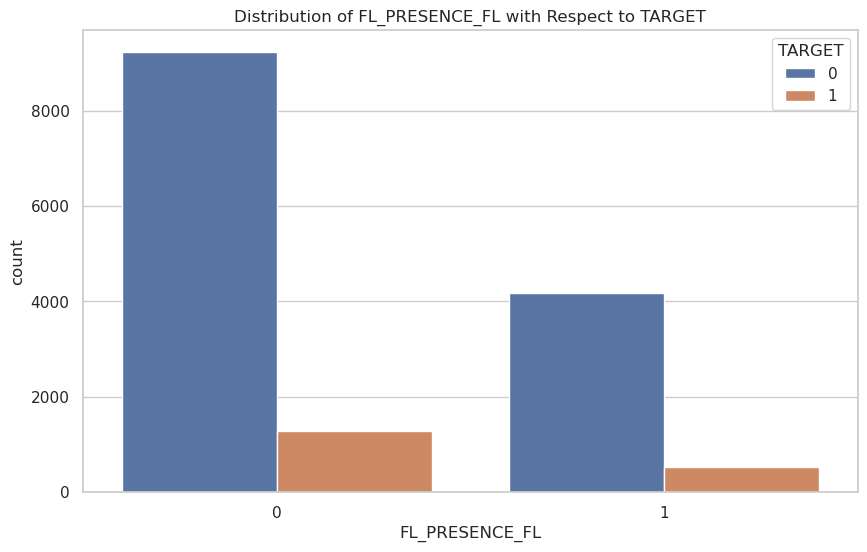

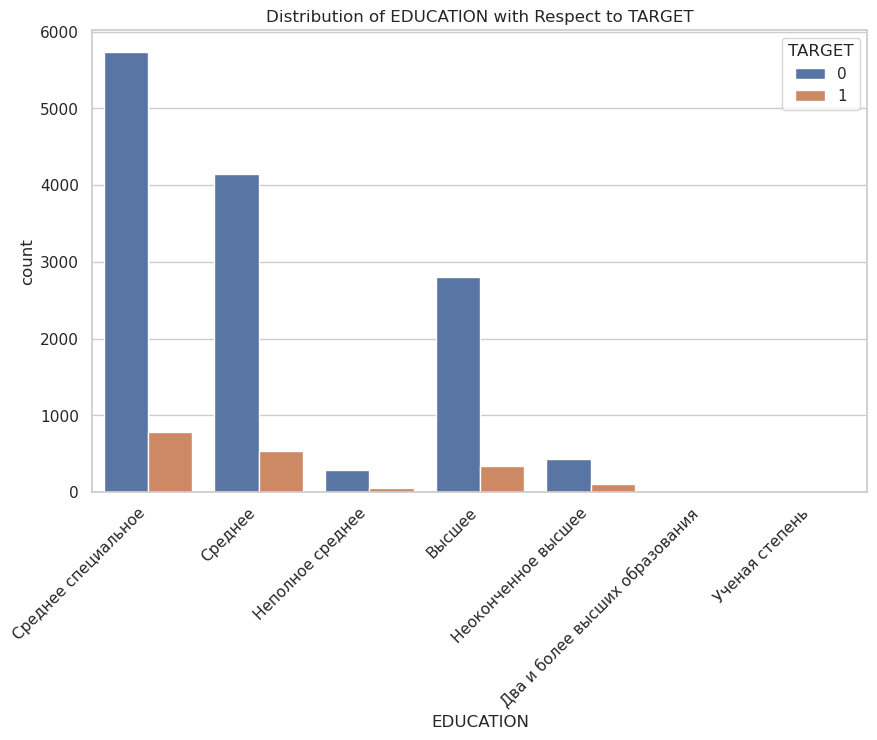

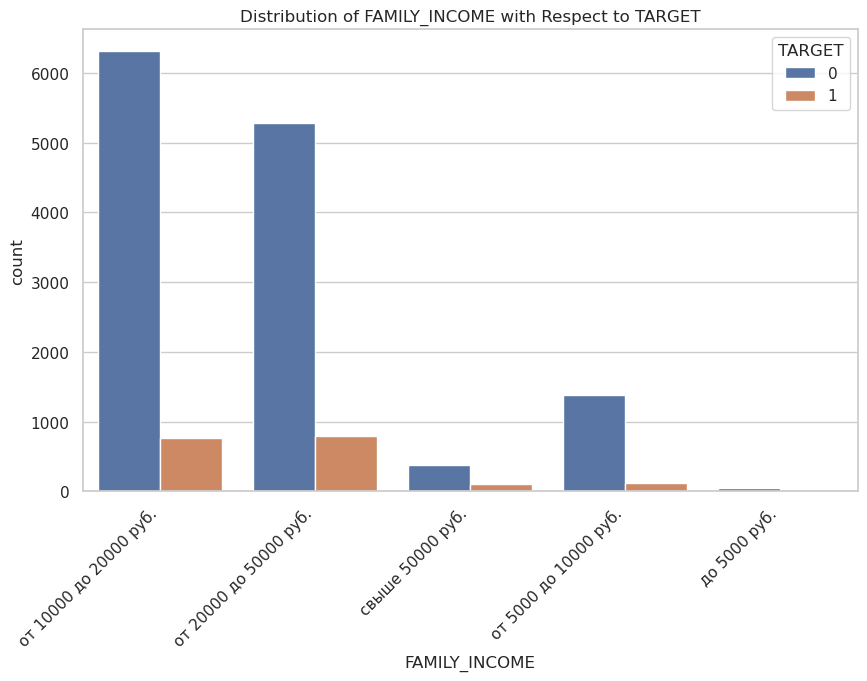

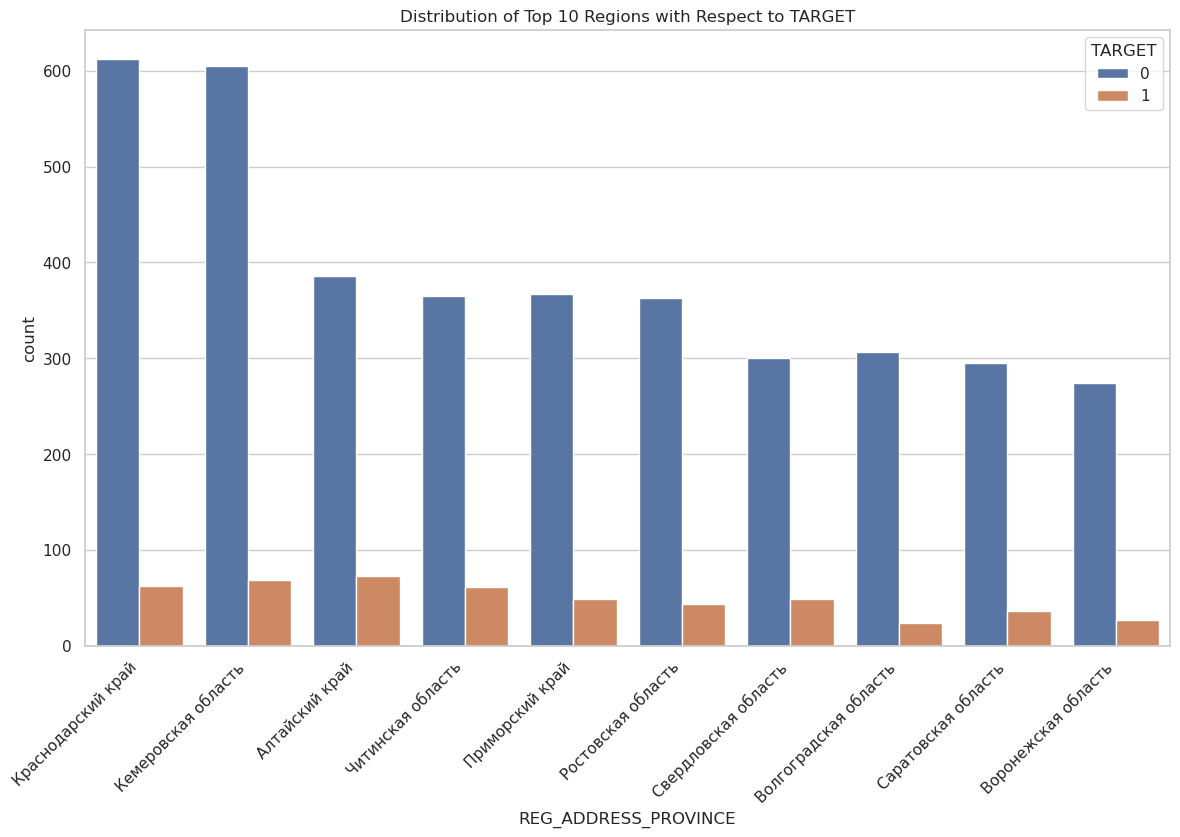

In [62]:
# Set the style for better visualization
sns.set(style="whitegrid")

# Assuming 'TARGET' is the name of your target column
target_column = 'TARGET'

# Numerical columns
numerical_columns = ['AGE', 'CHILD_TOTAL', 'OWN_AUTO', 'PERSONAL_INCOME', 'NUM_LOANS', 'NUM_CLOSED_LOANS']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target_column, y=column, data=df)
    plt.title(f'{column} Distribution with Respect to {target_column}')
    plt.show()

# Categorical columns
categorical_columns = ['GENDER', 'MARITAL_STATUS', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL',
                        'FL_PRESENCE_FL', ]

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue=target_column, data=df)
    plt.title(f'Distribution of {column} with Respect to {target_column}')
    plt.show()


columns = ['EDUCATION', 'FAMILY_INCOME']
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue=target_column, data=df)
    plt.title(f'Distribution of {column} with Respect to {target_column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()


# String column with many values
# Displaying the top 10 regions for better visualization
plt.figure(figsize=(14, 8))
sns.countplot(x='REG_ADDRESS_PROVINCE', hue=target_column, data=df, order=df['REG_ADDRESS_PROVINCE'].value_counts().head(10).index)
plt.title(f'Distribution of Top 10 Regions with Respect to {target_column}')
plt.xticks(rotation=45, ha='right')
plt.show()